In [22]:
import pandas as pd
df = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 내가 해본 시도

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df['SkinThickness'].replace(0, df['SkinThickness'].mean().round(2), inplace=True)
df['Insulin'].replace(0, df['Insulin'].mean().round(2), inplace=True)
df['Glucose'].replace(0, df['Glucose'].mean().round(2), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].mean().round(2), inplace=True)
df['BMI'].replace(0, df['BMI'].mean().round(2), inplace=True)

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,79.8,33.6,0.627,50,1
1,1,85.0,66.0,29.00,79.8,26.6,0.351,31,0
2,8,183.0,64.0,20.54,79.8,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00,79.8,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.54,79.8,30.1,0.349,47,1


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y_df = df['Outcome']
X_df = df.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state=11)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {'max_depth' : [2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf' :[1,2,4,8]}
grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_dclf.fit(X_train, y_train)
best_dclf = grid_dclf.best_estimator_


dpredictions = best_dclf.predict(X_test)
dpred_proba= best_dclf.predict_proba(X_test)[:,1]

def get_clf_eval(y_test , dpredictions, dpred_proba):
    confusion = confusion_matrix(y_test, dpredictions)
    accuracy = accuracy_score(y_test, dpredictions)
    precision = precision_score(y_test, dpredictions)
    recall = recall_score(y_test,dpredictions)
    f1 = f1_score(y_test, dpredictions)
    roc = roc_auc_score(y_test, dpredictions)
    print('혼동행렬 :\n {}'.format(confusion))
    print('정밀도: {:.3f}, 재현율 : {:.3f}, f1 : {:.3f}, AUC : {:.3f}'.format(precision, recall, f1, roc))


get_clf_eval(y_test, dpredictions, dpred_proba)

혼동행렬 :
 [[86 14]
 [29 25]]
정밀도: 0.641, 재현율 : 0.463, f1 : 0.538, AUC : 0.661


In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681576,72.255013,26.607526,118.660417,32.450768,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115878,9.630580,93.080252,6.875376,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.540000,79.800000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.800000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
from sklearn.preprocessing import Binarizer
dpred_proba = dpred_proba.reshape(-1,1)

thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, dpred_proba, thresholds):
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold =custom_threshold).fit(dpred_proba)
        custom_predict = binarizer.transform(dpred_proba)
        print('임곗값', custom_threshold)
        get_clf_eval(y_test, custom_predict, dpred_proba)
        print()
get_eval_by_threshold(y_test, dpred_proba, thresholds)

임곗값 0.4
혼동행렬 :
 [[81 19]
 [18 36]]
정밀도: 0.655, 재현율 : 0.667, f1 : 0.661, AUC : 0.738

임곗값 0.45
혼동행렬 :
 [[84 16]
 [25 29]]
정밀도: 0.644, 재현율 : 0.537, f1 : 0.586, AUC : 0.689

임곗값 0.5
혼동행렬 :
 [[86 14]
 [29 25]]
정밀도: 0.641, 재현율 : 0.463, f1 : 0.538, AUC : 0.661

임곗값 0.55
혼동행렬 :
 [[89 11]
 [30 24]]
정밀도: 0.686, 재현율 : 0.444, f1 : 0.539, AUC : 0.667

임곗값 0.6
혼동행렬 :
 [[92  8]
 [33 21]]
정밀도: 0.724, 재현율 : 0.389, f1 : 0.506, AUC : 0.654



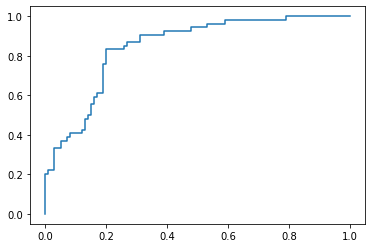

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# def roc_curve_plot(y_test, pred_porba_c1) :
#     fprs,tprs, thresholds = roc_curve(y_test, pred_proba_c1)
#     plt.plot(fprs, tprs, label='ROC')
#     plt.plot([0,1],[0,1], 'k--', label='Random')
    
#     start, end = plt.xlim()
#     plt.xticks(np.round(np.arange(start, end, 0.1), 2))
#     plt.xlim(0,1)
#     plt.ylim(0,1)
#     plt.xlabel('FPR(1-specificity')
#     plt.ylabel('TPR(Recall)')
#     plt.legend()
#     plt.show()
# roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])


import matplotlib.pyplot as plt
def curve(y_test, dpred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, dpred_proba)
    plt.plot(fprs, tprs, label='ROC')

curve(y_test, dpred_proba)

## 선생님 답안 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/diabetes.csv')
df

In [ ]:
print('j')